Imports


In [1]:
import numpy as np
from helpers import create_band_matrix, create_forcing_matrix, create_graph
from matrix_algorithms import (
    solve_jacobi,
    solve_jacobi_optimized,
    solve_gauss_seidel,
    solve_gauss_seidel_optimized,
    solve_l_u,
    solve_l_u_optimized,
    OutputSolution,
)
from app_types import Config
import os

In [2]:
# Glocal variables & config

OUTPUT_DOCS_PATH = "../docs"

if not os.path.exists(OUTPUT_DOCS_PATH):
    os.makedirs(OUTPUT_DOCS_PATH)

Task A


In [3]:
index = 197839

thrid_digit = index // 1000 % 10  # 3rd digit of index
fourth_digit = index // 100 % 10  # 4th digit of index

before_last = index // 10 % 10  # before last digit of index
last_digit = index % 10  # last digit of index

a1 = 5 + fourth_digit  # a1 = 5 + 4th digit of index
a2 = a3 = -1

N = 1200 + 10 * before_last + last_digit

A = create_band_matrix(a1, a2, a3, N)
b = create_forcing_matrix(N, thrid_digit + 1)

print(A)
print(b)

[[13 -1 -1 ...  0  0  0]
 [-1 13 -1 ...  0  0  0]
 [-1 -1 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 13 -1 -1]
 [ 0  0  0 ... -1 13 -1]
 [ 0  0  0 ... -1 -1 13]]
[[ 0.98935825]
 [ 0.91794788]
 [ 0.3781055 ]
 ...
 [ 0.96749073]
 [-0.72202085]
 [-0.69618518]]


Task B


In [ ]:
jacobi: OutputSolution = solve_jacobi(A, b)
print(
    f"Jacobi iterations: {jacobi.iterations}, time: {jacobi.time}, residual norm: {jacobi.errors[-1]}"
)

jacobi_optimized: OutputSolution = solve_jacobi_optimized(A, b)
print(
    f"Jacobi optimized iterations: {jacobi_optimized.iterations}, time: {jacobi_optimized.time}, residual norm: {jacobi_optimized.errors[-1]}"
)

print("errors", jacobi_optimized.errors)
print("len", len(jacobi_optimized.errors))


gauss: OutputSolution = solve_gauss_seidel(A, b)
print(
    f"Gauss iterations: {gauss.iterations}, time: {gauss.time}, residual norm: {gauss.errors[-1]}"
)

gauss_optimized: OutputSolution = solve_gauss_seidel_optimized(A, b)
print(
    f"Gauss optimized iterations: {gauss_optimized.iterations}, time: {gauss_optimized.time}, residual norm: {gauss_optimized.errors[-1]}"
)

l_u_solution: OutputSolution = solve_l_u(A, b)
print(f"LU time: {l_u_solution.time}, residual norm: {l_u_solution.errors[-1]}")

lu_optimized_solution: OutputSolution = solve_l_u_optimized(A, b)
print(
    f"LU optimized, time: {lu_optimized_solution.time}, residual norm: {lu_optimized_solution.errors[-1]}"
)

config = Config(
    x_label="Iterations",
    y_label="Residual Norm",
    title="Gauss-Seidel vs Jacobi Error Convergence",
    path=f"{OUTPUT_DOCS_PATH}/error_covergence.png",
    plot=[[jacobi.errors, "Jacobi Error"], [gauss.errors, "Gauss-Seidel Error"]],
    axhline=[[1e-9, "Convergence Threshold"]],
    figsize=(12, 5),
)


create_graph(config)

Task C


Jacobi iterations: 67, time: 93.08703637123108, residual norm: 1063986320.1875261, coverage: No
Jacobi optimized iterations: 67, time: 0.7290956974029541, residual norm: 1063986320.1875222
Gauss iterations: 29, time: 38.99271321296692, residual norm: 1507915347.4213738, coverage: No
Gauss optimized iterations: 29, time: 0.5031266212463379, residual norm: 1507915347.4213667


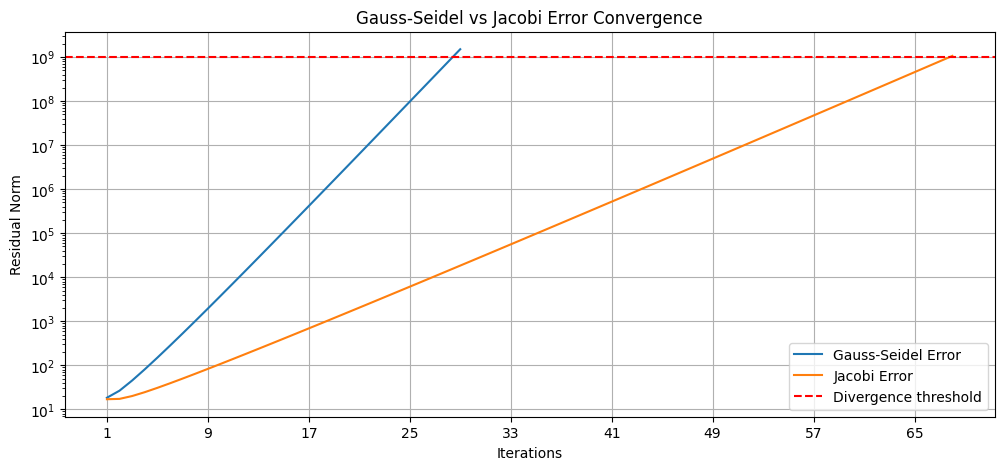

In [ ]:
# change A matrix parameters
A = create_band_matrix(3, -1, -1, N)

jacobi: OutputSolution = solve_jacobi(A, b)
print(
    f"Jacobi iterations: {jacobi.iterations}, time: {jacobi.time}, residual norm: {jacobi.errors[-1]}, coverage: {'Yes' if jacobi.does_converge else 'No'}"
)

jacobi_optimized: OutputSolution = solve_jacobi_optimized(A, b)
print(
    f"Jacobi optimized iterations: {jacobi_optimized.iterations}, time: {jacobi_optimized.time}, residual norm: {jacobi_optimized.errors[-1]}"
)

gauss: OutputSolution = solve_gauss_seidel(A, b)
print(
    f"Gauss iterations: {gauss.iterations}, time: {gauss.time}, residual norm: {gauss.errors[-1]}, coverage: {'Yes' if gauss.does_converge else 'No'}"
)

gauss_optimized: OutputSolution = solve_gauss_seidel_optimized(A, b)
print(
    f"Gauss optimized iterations: {gauss_optimized.iterations}, time: {gauss_optimized.time}, residual norm: {gauss_optimized.errors[-1]}"
)

config = Config(
    x_label="Iterations",
    y_label="Residual Norm",
    title="Gauss-Seidel vs Jacobi Error Convergence",
    path=f"{OUTPUT_DOCS_PATH}/error_covergence_alternative.png",
    plot=[[gauss.errors, "Gauss-Seidel Error"], [jacobi.errors, "Jacobi Error"]],
    axhline=[[1e9, "Divergence threshold"]],
    figsize=(12, 5),
)
create_graph(config)

Task D


In [ ]:
A = create_band_matrix(3, -1, -1, N)

l_u_solution: OutputSolution = solve_l_u(A, b)
print(f"Time: {l_u_solution.time}, residual norm: {l_u_solution.errors[-1]}")

l_u_solution_optimized: OutputSolution = solve_l_u_optimized(A, b)
print(
    f"Time: {l_u_solution_optimized.time}, residual norm: {l_u_solution_optimized.errors[-1]}"
)

KeyboardInterrupt: 

Task E


In [ ]:
Matrix_sizes = [100, 450, 800, 1150,1500]

data = {
    method: {
        "title": method.replace("_", " ").title(),
        "time": [],
    }
    for method in [
        "jacobi",
        "jacobi_optimized",
        "gauss_seidel",
        "gauss_seidel_optimized",
        "lu",
        "lu_optimized",
    ]
}


for size in Matrix_sizes:
    A = create_band_matrix(a1, a2, a3, size)
    b = create_forcing_matrix(size, thrid_digit + 1)

    jacobi: OutputSolution = solve_jacobi(A, b)
    gauss: OutputSolution = solve_gauss_seidel(A, b)
    l_u_solution: OutputSolution = solve_l_u(A, b)
    jacobi_optimized: OutputSolution = solve_jacobi_optimized(A, b)
    gauss_optimized: OutputSolution = solve_gauss_seidel_optimized(A, b)
    l_u_solution_optimized: OutputSolution = solve_l_u_optimized(A, b)

    data["jacobi"]["time"].append(jacobi.time)
    data["gauss_seidel"]["time"].append(gauss.time)
    data["lu"]["time"].append(l_u_solution.time)
    data["jacobi_optimized"]["time"].append(jacobi_optimized.time)
    data["gauss_seidel_optimized"]["time"].append(gauss_optimized.time)
    data["lu_optimized"]["time"].append(l_u_solution_optimized.time)


plot_data = [
    [Matrix_sizes, data[method]["time"], f"{data[method]['title']} Time"]
    for method in data
]

configLog = Config(
    x_label="Matrix N",
    y_label="Time (s)",
    title="Comparision of diffrent methods that solves linear equations (log scale)",
    path=f"{OUTPUT_DOCS_PATH}/time_comparison_log.png",
    plot=plot_data,
    log_y_axis=True,
    has_x_axis=True,
    figsize=(12, 5),
)
create_graph(configLog)

configLinear = Config(
    x_label="Matrix N",
    y_label="Time (s)",
    title="Comparision of diffrent methods that solves linear equations (linear scale)",
    path=f"{OUTPUT_DOCS_PATH}/time_comparison_linear.png",
    plot=plot_data,
    log_y_axis=False,
    has_x_axis=True,
    figsize=(12, 5),
)
create_graph(configLinear)